# Volatility & Correlation Calculations

In [19]:
import sys
sys.path.append('../Functions/')

from VolatilityCorrelationOEX import VolatilityCorrelation

vol = VolatilityCorrelation()

### Import The data via Pandas

In [20]:
import pandas as pd
df_imv_constituents=pd.read_csv('../../Data/ATM_IV_Constituents.csv',index_col=0)
df_imv_constituents.index=pd.to_datetime(df_imv_constituents.index)

df_imv_oex=pd.read_csv('../../Data/at_imv_oex.csv',index_col=0)
df_imv_oex.index=pd.to_datetime(df_imv_oex.index)
df_weights = pd.read_csv('../../Data/Weigths_OEX_PCA.csv',index_col=0)

In [21]:
df_imv_constituents

GSATMIV.U  UNPATMIV.U  LINATMIV.U  BLKATMIV.U  \
Date                                                                       
2019-02-01 00:00:00+00:00      22.38       20.00       21.67       20.24   
2019-02-04 00:00:00+00:00      21.26       18.86       21.46       20.10   
2019-02-05 00:00:00+00:00      21.20       18.35       21.58       19.99   
2019-02-06 00:00:00+00:00      21.20       18.25       21.58       19.83   
2019-02-07 00:00:00+00:00      22.48       18.71       22.97       21.06   
...                              ...         ...         ...         ...   
2021-01-26 00:00:00+00:00      31.82       27.11       27.24       26.62   
2021-01-27 00:00:00+00:00      38.06       31.21       30.97       32.62   
2021-01-28 00:00:00+00:00      34.04       29.85       29.50       29.71   
2021-01-29 00:00:00+00:00      36.24       30.51       31.30       32.61   
2021-02-01 00:00:00+00:00      32.88       29.98       31.71       28.29   

                           MCDATMIV.U  VATMIV.U  MAATMIV.U  CMCSAATMIV.U  
Date                                                                      
2019-02-01 00:00:00+00:00       15.07     17.80      20.43         21.05  
2019-02-04 00:00:00+00:00       14.75     17.14      19.59         20.79  
2019-02-05 00:00:00+00:00       14.59     16.54      18.75         20.53  
2019-02-06 00:00:00+00:00       14.84     16.50      18.58         20.42  
2019-02-07 00:00:00+00:00       15.84     18.73      20.18         21.31  
...                               ...       ...        ...           ...  
2021-01-26 00:00:00+00:00       24.28     28.55      32.26         30.61  
2021-01-27 00:00:00+00:00       31.59     33.70      36.18         39.45  
2021-01-28 00:00:00+00:00       25.34     30.92      32.63         34.09  
2021-01-29 00:00:00+00:00       26.78     32.80      34.34         33.51  
2021-02-01 00:00:00+00:00       24.26     28.86      32.06         30.18  

[504 rows x 8 columns]

In [22]:
df_imv_oex

OEX
Date                            
2019-02-01 00:00:00+00:00  13.66
2019-02-04 00:00:00+00:00  13.15
2019-02-05 00:00:00+00:00  13.18
2019-02-06 00:00:00+00:00  13.19
2019-02-07 00:00:00+00:00  13.94
...                          ...
2021-01-26 00:00:00+00:00  18.49
2021-01-27 00:00:00+00:00  29.03
2021-01-28 00:00:00+00:00  23.38
2021-01-29 00:00:00+00:00  26.85
2021-02-01 00:00:00+00:00  23.90

[504 rows x 1 columns]

In [23]:
df_weights

coef  std err       t  P>|t|  [0.025  0.975]
GS     0.0788    0.013   6.187  0.000   0.054   0.104
UNP    0.0469    0.015   3.116  0.002   0.017   0.076
LIN    0.1240    0.015   8.065  0.000   0.094   0.154
BLK    0.1582    0.015  10.699  0.000   0.129   0.187
MCD    0.0803    0.016   5.127  0.000   0.050   0.111
V      0.1354    0.026   5.300  0.000   0.085   0.186
MA     0.0783    0.021   3.663  0.000   0.036   0.120
CMCSA  0.1110    0.014   8.078  0.000   0.084   0.138

In [24]:
weighted_imv_constituents = (df_weights.coef.tolist()*df_imv_constituents).sum(axis=1)

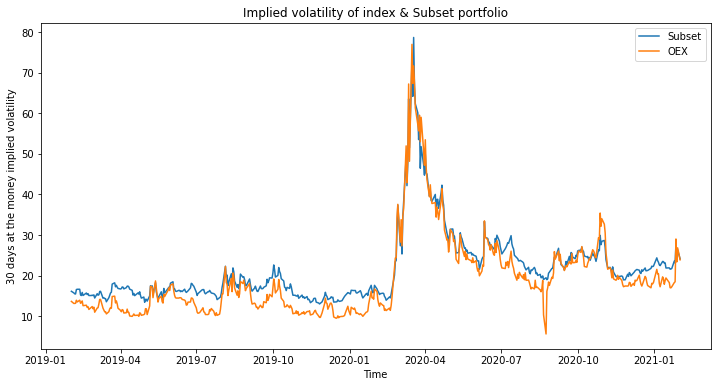

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


#plot of the volatility of the index & tracking portfolio
#ax = plt.gca()
#date formatting
#formatter = mdates.DateFormatter("%Y") ### formatter of the date
#locator = mdates.YearLocator() ### where to put the labels

plt.figure(figsize=(12,6))
plt.plot(weighted_imv_constituents, label='Subset')
plt.plot(df_imv_oex, label='OEX')

#ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
#ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis
plt.title("Implied volatility of index & Subset portfolio")
plt.xlabel("Time")
plt.ylabel("30 days at the money implied volatility")
plt.legend()
plt.savefig('../../Graphs/implied_vol_index_trackng.png')
plt.show()

In [26]:
print(f"Lowest IV at date {df_imv_oex.idxmin()}, with values {df_imv_oex.min()}")

Lowest IV at date OEX   2020-08-24 00:00:00+00:00
dtype: datetime64[ns, UTC], with values OEX    5.64
dtype: float64


## Dispersion

The function to calculate the amount of dispersion according to CBOE

![image](../../graphs/dispersion_function.png)

In [27]:
dispersion = vol.dispersion(df_imv_oex,df_imv_constituents,df_weights.coef.tolist())

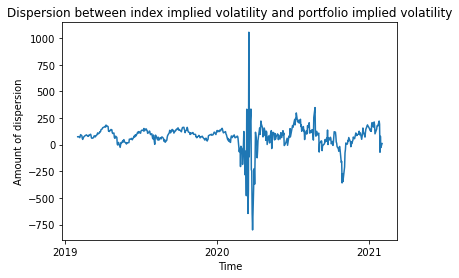

In [28]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#plotting
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

#plot of the disperision 
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis
plt.plot(dispersion)
plt.title("Dispersion between index implied volatility and portfolio implied volatility")
plt.xlabel("Time")
plt.ylabel("Amount of dispersion")
plt.savefig("../../Graphs/dispersion_oex.png")
plt.show()

## Implied correlation

Formula:
![image](../../graphs/implied_correlation_function.png)

In [29]:
i_corr = vol.implied_correlation(df_imv_oex,df_imv_constituents,df_weights.coef.tolist())
i_corr

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is d

../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr=df_implied_corr.append(df_temp)


implied_corr                      Date
0       0.255595 2019-02-01 00:00:00+00:00
0       0.249323 2019-02-04 00:00:00+00:00
0       0.259916 2019-02-05 00:00:00+00:00
0       0.262190 2019-02-06 00:00:00+00:00
0       0.256050 2019-02-07 00:00:00+00:00
..           ...                       ...
0       0.221367 2021-01-26 00:00:00+00:00
0       0.423174 2021-01-27 00:00:00+00:00
0       0.327224 2021-01-28 00:00:00+00:00
0       0.404131 2021-01-29 00:00:00+00:00
0       0.372820 2021-02-01 00:00:00+00:00

[504 rows x 2 columns]

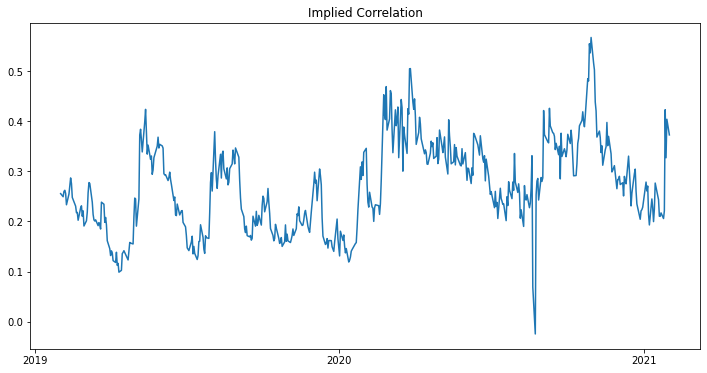

In [30]:
i_corr['Date']= pd.to_datetime(i_corr['Date'])


#plotting
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

plt.figure(figsize=(12,6))
plt.title("Implied Correlation")

#plot of the disperision 

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis


plt.plot(i_corr.Date,i_corr.implied_corr)

## Sample Correlation
Formula:
![image](../../graphs/correlation_sample_formula.png)

In [31]:
import pandas as pd
import datetime

#import price constituents
price_portfolio=pd.read_csv("../../Data/price/constituents_oex_cleansed.csv",index_col=0)
price_portfolio.index=pd.to_datetime(price_portfolio.index)

#import implied volatility constituents
df_imv_constituents=pd.read_csv('../../Data/ATM_IV_Constituents.csv',index_col=0)
df_imv_constituents.index=pd.to_datetime(df_imv_constituents.index)


#import weights
df_weights = pd.read_csv('../../Data/Weigths_OEX_PCA.csv',index_col=0)

#calculate returns
ret_portfolio=price_portfolio.pct_change().dropna()

In [32]:
ret_portfolio = ret_portfolio[df_weights.index]
ret_portfolio

GS       UNP       LIN       BLK       MCD         V  \
Date                                                                     
2018-06-20 -0.002190  0.003852 -0.001867 -0.000057 -0.014609  0.002887   
2018-06-21 -0.003687 -0.001814  0.005483 -0.003039 -0.012488 -0.007159   
2018-06-22 -0.004229  0.005940  0.014563 -0.004267  0.025042  0.005947   
2018-06-25 -0.019821 -0.018896 -0.021121 -0.014539 -0.028806 -0.032513   
2018-06-26  0.000181  0.000212 -0.003940 -0.008328  0.006883  0.012373   
...              ...       ...       ...       ...       ...       ...   
2022-02-08  0.005297  0.007464  0.007556 -0.011666  0.000885  0.003434   
2022-02-09  0.011970  0.014571  0.018212  0.006948 -0.000846  0.012854   
2022-02-10 -0.010573 -0.017729  0.015453 -0.042817 -0.011506 -0.021280   
2022-02-11 -0.020266 -0.013671 -0.045718 -0.007325 -0.006657 -0.003990   
2022-02-14 -0.007767  0.015661 -0.004139 -0.015767 -0.006937  0.002893   

                  MA     CMCSA  
Date                            
2018-06-20  0.009264  0.017678  
2018-06-21 -0.003771 -0.017970  
2018-06-22  0.003486  0.031107  
2018-06-25 -0.032261 -0.020408  
2018-06-26  0.007591 -0.010266  
...              ...       ...  
2022-02-08 -0.004679  0.007163  
2022-02-09  0.018698  0.011380  
2022-02-10 -0.018302 -0.017079  
2022-02-11 -0.012340 -0.026574  
2022-02-14  0.011872 -0.004620  

[921 rows x 8 columns]

In [33]:
sample_correlation = vol.sample_correlation(ret_portfolio,df_imv_constituents,df_weights.coef.tolist())
sample_correlation

../Functions\VolatilityCorrelationOEX.py:114: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr = corr.loc[portfolio_ivol.index[0]:portfolio_ivol.index[-1]]
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timez

../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)


../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]
../Functions\VolatilityCorrelationOEX.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_implied_corr_sample=df_implied_corr_sample.append(df_temp)
../Functions\VolatilityCorrelationOEX.py:130: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  corr_row = corr.loc[date]


implied_corr                      Date
0       4.548109 2019-02-01 00:00:00+00:00
0       4.466097 2019-02-04 00:00:00+00:00
0       4.358051 2019-02-05 00:00:00+00:00
0       4.283300 2019-02-06 00:00:00+00:00
0       4.047448 2019-02-07 00:00:00+00:00
..           ...                       ...
0       3.189488 2021-01-26 00:00:00+00:00
0       3.954436 2021-01-27 00:00:00+00:00
0       4.172636 2021-01-28 00:00:00+00:00
0       4.207086 2021-01-29 00:00:00+00:00
0       4.253655 2021-02-01 00:00:00+00:00

[504 rows x 2 columns]

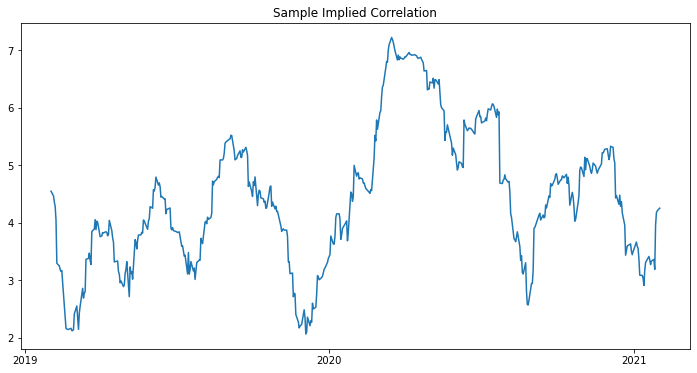

In [34]:
#plotting
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

plt.figure(figsize=(12,6))
plt.title("Sample Implied Correlation")

#plot of the disperision 

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis


plt.plot(sample_correlation.Date,sample_correlation.implied_corr)

## Indicator
Formula:
![image](../../graphs/indicator_function.png)

In [35]:
i_corr = i_corr.set_index('Date')
sample_correlation = sample_correlation.set_index('Date')

In [36]:
indicator = vol.indicator(i_corr,sample_correlation)

AttributeError: 'VolatilityCorrelation' object has no attribute 'indicator'

In [ ]:
#plotting
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

plt.figure(figsize=(12,6))
plt.title("Indicator")

#plot of the disperision 

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis


plt.plot(indicator)

In [ ]:
moving_average = indicator.rolling(30).mean()
moving_std = indicator.rolling(30).std()
bol_up = moving_average+(1.5*moving_std)
bol_down = moving_average-(1.5*moving_std)

In [ ]:
#plotting
formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

plt.figure(figsize=(12,6))
plt.title("Indicator Implied Correlation")

#plot of the disperision 

ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

plt.plot(indicator)
plt.plot(moving_average)
plt.plot(bol_up)
plt.plot(bol_down)
plt.savefig('../../Graphs/Entry_Signal_Indiator_IC.png')
#plt.fill_between(moving_average.index,bol_up,bol_down, alpha=0.2)


In [ ]:
short = indicator[indicator.values<bol_down.values]
long = indicator[indicator.values>bol_up.values]

In [ ]:
short['trade']='Short'
long['trade']='Long'

In [ ]:
entery_signal = pd.concat([short,long])
entery_signal = entery_signal.sort_index()
entery_signal = entery_signal.drop(columns='implied_corr')
entery_signal

In [ ]:
entery_signal.to_csv('../../Data/Entery_Signal.csv')